# Electrical signaling in plants - Logbook

### by Teo Ruffini, Driscoll Elementary Science Fair, March 2016

## INDEX

- Background

- Hypothesis

- Build process

- Experimental plan

- Method and Materials 

- Read recorded data

- First data acquisition (March 2nd 2016 18:36)

- Look at the data

- We plot the data to see what it looks like, both signal and flag channels 

- Let's look at the spectrum of the data

- Now we filter the signal to eliminate noise (we look for low frequency changes)

- The data has been filtered to eliminate noise. We can plot it now and see if there is something interesting going on 
with the light changes

- We do tests with fire

- Conclusions

- References

- Annex: some needed functions for filtering

# Abstract

In this project we are demonstrating that plants communicate internally by electrical signals. We are putting the plant into different experiments: Lights on, lights off, etc... We will connect to the plant to a super sensitive voltmeter, and we will record the experiments in second intervals. After that, we will compare the data under the conditions, and then we will conclude if there are differences. This is the main idea of the project.

### Question: 
Do plants use electrical signaling when exposed to light?

### Hypothesis: 
We will verify that the electrical signaling of the plant will increase when the lights are on, and will decrease when the lights are off.



## Background

It has been recently proposed and verified that plants communicate internally using electrical signals (*Fromm & Lautner 2007*). For example, Trebacz and Zawadzki (2006) verified the presence of action potentials in the response to light of the plant *Concephalum Conicun*.  In this context we wanted to check using sensitive non-invasive Electroencephalography (EEG) technology, whether we could detect electrical changes in the plant when exposed to changing lighting conditions. In our experiment, the plant that we used is the *Beaucarnea Recurvata*. Our motivation is twofold. First to develop the techniques to measure electrical signals in plants in a new plant. Second, to prepare the ground for future experiments using electrical stimulation in plants.


## Experimental plan


### Materials: 
- Plant (*Beaucarnea Recurvata*)

- Starstim (super sensitive voltmeter and stimulation device)

- laptop computer (to receive data via bluetooth)

- Faraday cage (shielding)

- light sources (leds)

- computer with timer auditory signals

###  PROCEDURE

#### Preparation:

First, we prepared the plant applying small cuts to get to the plant's stem interior for better electrical signal capture. We placed some conductive gel on the exposed stem cuts and attached adhesive electrodes (four in total, see Figure 1), and connected the EEG recording device (Starstim, by Neuroelectrics) to the electrodes. Then, we inserted the plant in the Faraday's cage interior to reduce external electromagnetic interference in the recordings (mainly 60 Hz line noise from the house electrical system).

#### Recording:

A MacBook Pro computer was used to control the EEG device. A second laptop was used to set up an audible timer (10 seconds bell) for the lighting system operator (my dad) using Matlab. After verifying that the EEG recording signals were of good quality (low noise /amplitude), we recorded 3-5 minute data segments of electrical activity with markers on the lighting transitions. Every 10 seconds the operator switched on then off a set of LED lights of medium intensity directed to the plant. 

#### Data Analysis
The data was low pass filtered below 1 Hz to reduce ambient noise after detrending (see Figure 2). The 10 second data segments of each condition (lights on or lights off) were then averaged to compare the two conditions, as shown in Figure 3.  

In summary, we will compare the electrical signals in the two conditions, $A$ and $B$ and verify if there are differences in the patterns of electricity. Repeat a couple of times and conclude.

In [1]:
from IPython.display import display
from IPython.display import Image
#Image('./plantdata/plant.')

In [133]:
from IPython.display import YouTubeVideo
YouTubeVideo('sVJMFlD9OdQ')

# Here we are going to read the recorded data and do some simple analysis

# First data acquisition (March 2nd 2016 18:36)

In [117]:
# load needed libraries for reading txt data, dealing with arrays and plotting
from pandas import DataFrame, read_csv
import pandas as pd #this is how I usually import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt, freqz, detrend,periodogram,savgol_filter 
%matplotlib inline  

# define the filename to read:
Location ='./plantdata/20160302183637_PlantTest2.easy'

# Load the data: 
df = pd.read_csv(Location,delim_whitespace=True)

In [118]:
df.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']

## Ok, let us look at the data:

In [119]:
# get rid of columns we don't need here.
d = df.drop(['Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8'], axis=1)

In [120]:
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000-d.Ch1[0]/1000 # go to uV
fs=500. # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/1000. # go to seconds 

In [121]:
# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(df.Flag)*0.
s=0 # to start with, light was off

for n, val in enumerate(df.Flag):
    # if we see a flag equal to 2, light is off
    if df.Flag[n] == 2.:
        s=0
    # if flag is one, light is on
    elif df.Flag[n]==1.:
        s=1
    u[n]=s

Plot the data in Channel one, and also the light status variable:

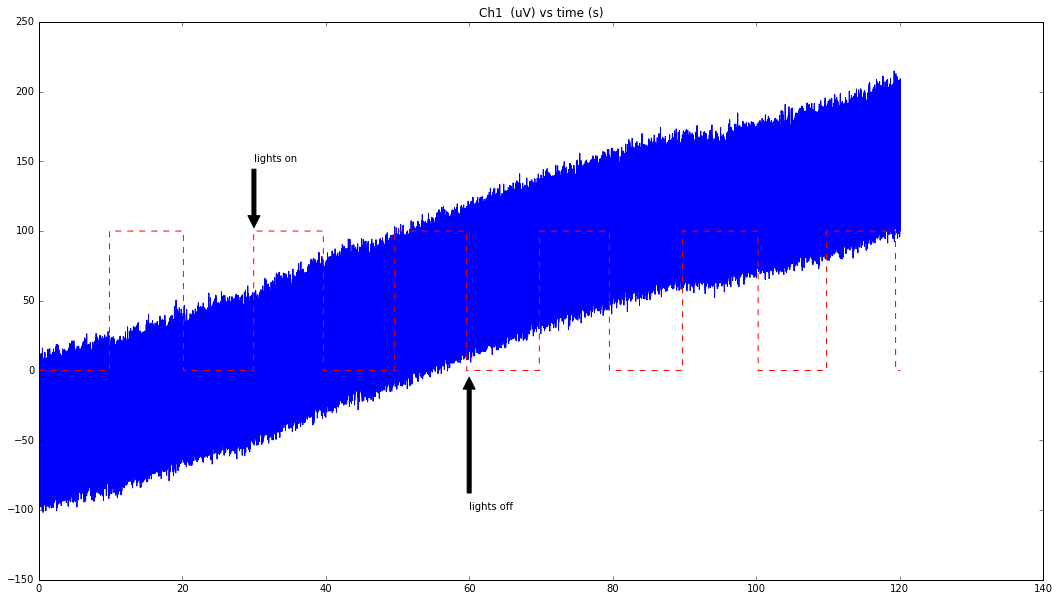

In [124]:
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], d.Ch1,d['t'], u*100, 'r--') 
plt.title('Ch1  (uV) vs time (s)')

plt.annotate('lights on', xy=(30, 100), xytext=(30, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(60, 0), xytext=(60, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

Figure: the raw data (unfiltered)

### There is a linear trend in the data, let us look at it a bit closer (zoom in in time):

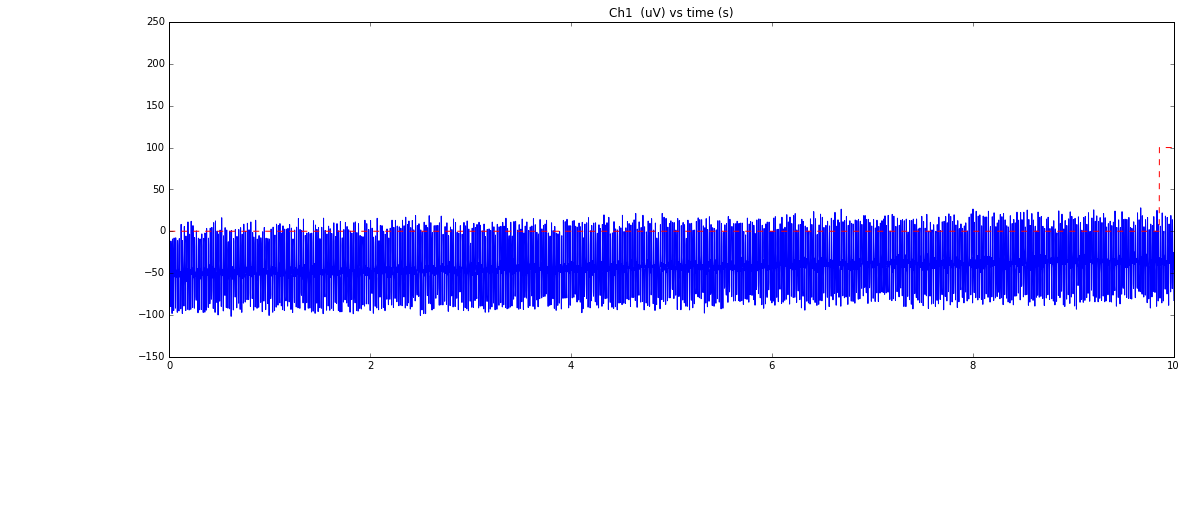

In [10]:
fig = plt.figure(figsize=[18.0, 6])
plt.plot(d['t'], d.Ch1,d['t'], u*100, 'r--') 
plt.title('Ch1  (uV) vs time (s)')
plt.annotate('lights on', xy=(75, 100), xytext=(75, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(50, 0), xytext=(50, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlim((0,10))
plt.show()

## Let us look at the spectrum of the signal

The concept of Fourier decomposition of a signal into a sum of components:

In [11]:
Image(url= 'http://dagsaw.sdsu.edu/images/fig3-4.gif')

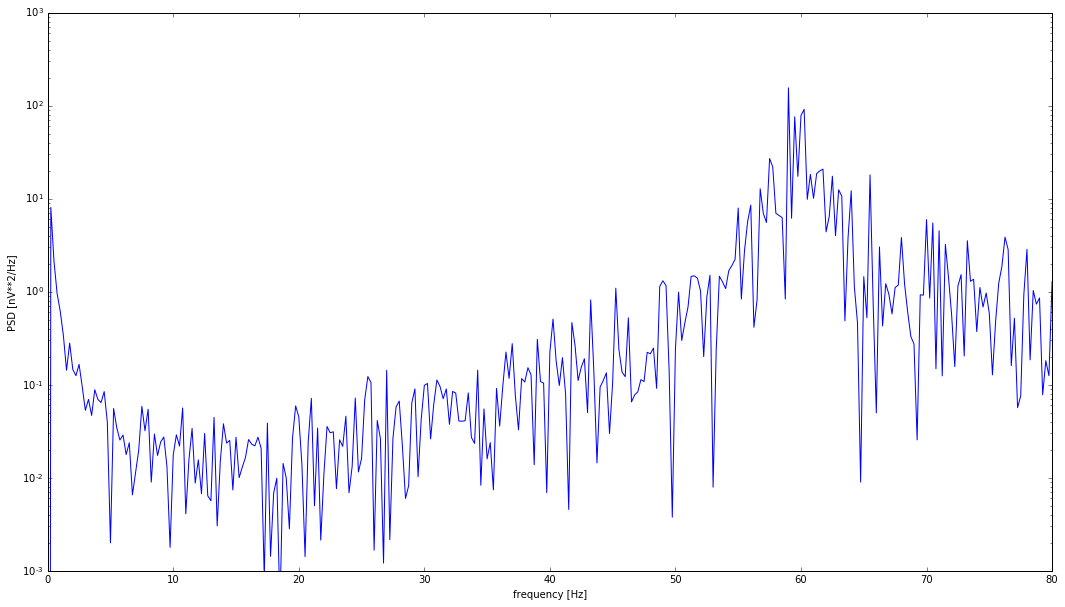

In [125]:
# And this is the spectrum of our signal. Notice the peak at 60 Hz.
plotSpectrum(d.Ch1)

Figure: unfiltered spectrum

## Now we filter the signal to eliminate noise (we look for low frequency changes)

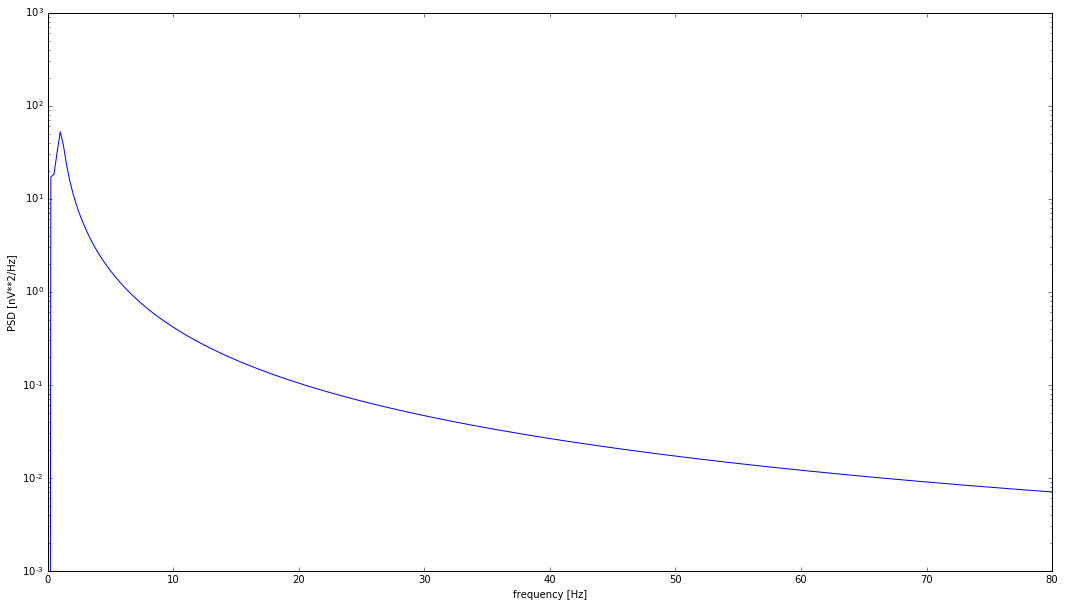

In [17]:
d['Ch1 filtered']= butter_lowpass_filter(detrend(d.Ch1), cutoff=1, fs=500, order=6)
plotSpectrum(d['Ch1 filtered'])

Figure: filtered spectrum

## The data has been filtered to eliminate noise. We can plot it now and see if there is something interesting going on with the light changes

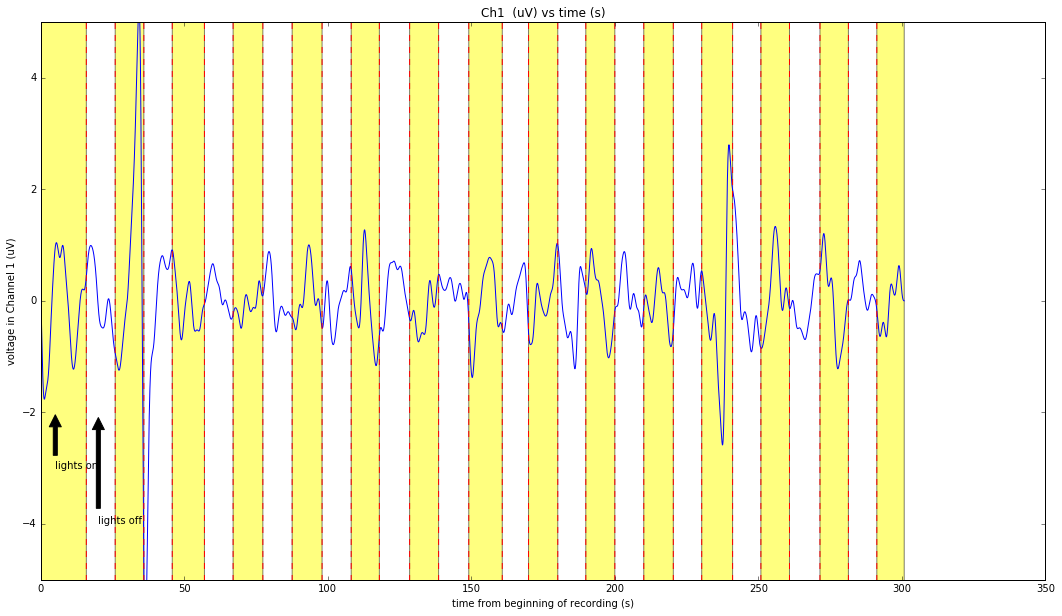

In [108]:
light=u*20-10
fig = plt.figure(figsize=[18.0, 10])
#plt.plot(d['t'], d['Ch1 filtered'],d['t'], light, 'r--') 
plt.plot(d['t'], ConditionSignal(d.Ch1),d['t'], light, 'r--') 
plt.title('Ch1  (uV) vs time (s)')

plt.annotate('lights on', xy=(5, -2), xytext=(5, -3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(20, -2), xytext=(20, -4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage in Channel 1 (uV)')
plt.ylim((-5,5))
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.savefig('plantPlot.png')
plt.show()

Figure: In this figure we show the filtered voltage signal (uV) with the lights-on /lights-off condition superimposed in yellow (yellow=lights on)

## Second experiment (March 9th 2016)

We did different tests.
TestPlant1= This was a test without Faraday cage

TestPlant2= This was a test with Faraday cate

TestPlant3wierd2= flashing light for 5 minutes

TestPlant3lightsonoff= Lights on, lights off or 5 minutes each 10 seconds

TestPlant4fire= putting a flame to one of the leaves, and then separating the fire from the leave

In [138]:
d = pd.read_csv('plantdata/20160309191904_PlantTest3lightsonoff.easy',delim_whitespace=True)
d.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000.-d.Ch1[0]/1000. # go to uV
d.Ch2=d.Ch2/1000.-d.Ch2[0]/1000. # go to uV
d.Ch3=d.Ch3/1000.-d.Ch3[0]/1000. # go to uV

d.Flag[0]=1;
D= detrend(d.Ch3-d.Ch1)

fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/1000.

# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(d.Flag)*0.
s=0 # to start with, light was off

for n, val in enumerate(d.Flag):
    # if we see a flag equal to 2, light is on
    if d.Flag[n] == 2.:
        s=0
    # if flag is one, light is off
    elif d.Flag[n]== 1.:
        s=1
    u[n]=s
    
light=u*20-10    
d.Ch1=ConditionSignal(d.Ch1)

AverageLight=np.zeros(fs*8)
countLight=0
AverageDark=np.zeros(fs*8)
countDark=0

AverageLightStack=detrend(d.Ch1[0:0+fs*8])*0.0;
AverageDarkStack=detrend(d.Ch1[0:0+fs*8])*0.0;


#for n, val in enumerate(d.Flag[0:]):
for n in range(0,259*np.int(fs)):
    # if we see a flag equal to 2, light is off
    if d.Flag[n] == 2.:
        print "got dark"
        AverageLight[:] =AverageLight[:] + detrend(d.Ch1[n:n+fs*8])
        AverageLightStack=np.vstack((AverageLightStack, detrend(d.Ch1[n:n+fs*8])))
        countLight +=1
        
    if d.Flag[n] == 1.:
        print "got light"
        AverageDark[:]  =AverageDark[:] + detrend(d.Ch1[n:n+fs*8])
        AverageDarkStack=np.vstack((AverageDarkStack, detrend(d.Ch1[n:n+fs*8])))
        countDark +=1

AverageLight=AverageLight/countLight;
AverageDark=AverageDark/countDark;



got light
got dark
got light
got dark
got dark
got light
got dark
got light
got dark
got light
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light


/home/giulio/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
AverageLightStack =np.delete(AverageLightStack, 1, 0)
AverageDarkStack =np.delete(AverageDarkStack, 1, 0)

In [140]:
(np.std(AverageLightStack,axis=0))/4.

array([ 0.36685342,  0.36681993,  0.36678529, ...,  0.25568222,
        0.25589124,  0.25610056])

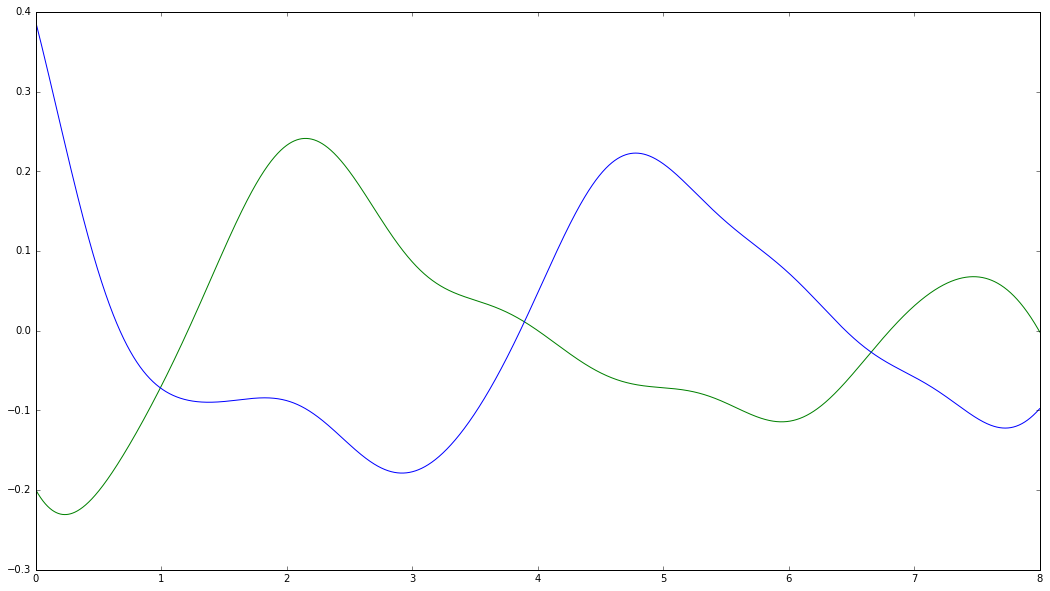

In [137]:
fig = plt.figure(figsize=[18.0, 10])
theTime=np.arange(fs*8)/(fs*1.0)
plt.plot(theTime, (AverageLight),'g',theTime,
         (AverageDark), 'b') 
#plt.title('Ch1, Ch2  and Ch3 (uV) vs time (s)')

#plt.annotate('lights on', xy=(25, -3), xytext=(25, -4),
           # arrowprops=dict(facecolor='black', shrink=0.05),
           # )
#plt.annotate('lights off', xy=(50, -3), xytext=(50, -4),
            #arrowprops=dict(facecolor='black', shrink=0.05),
            #)
#plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
#plt.ylim((-5,5))

plt.show()



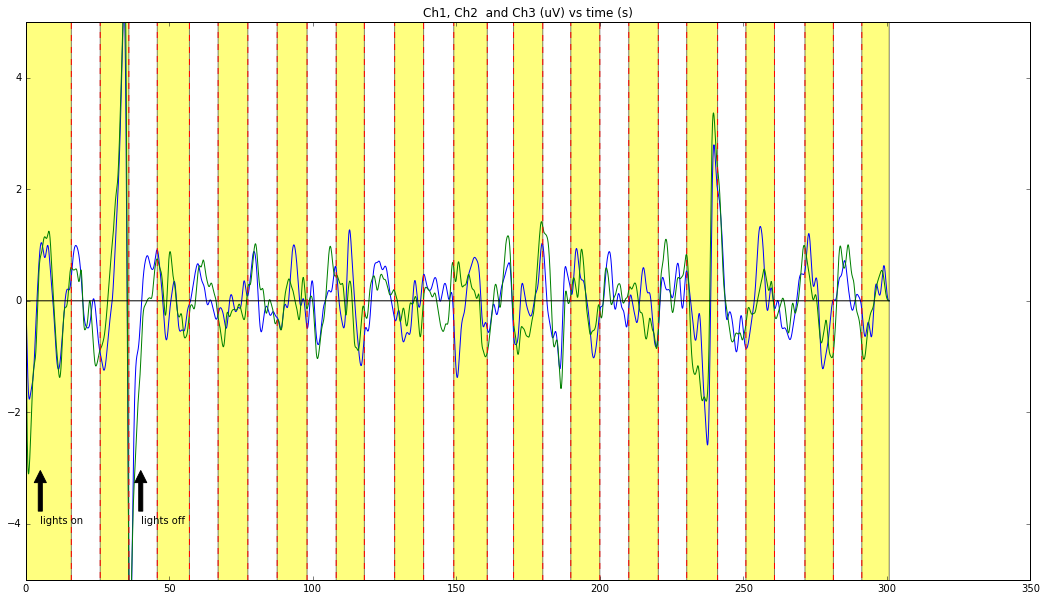

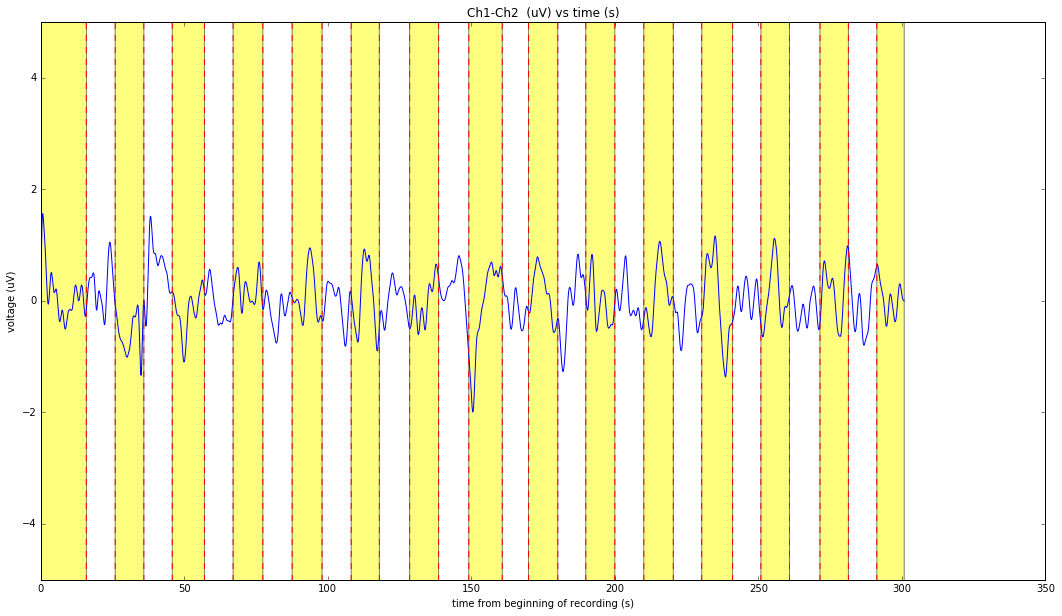

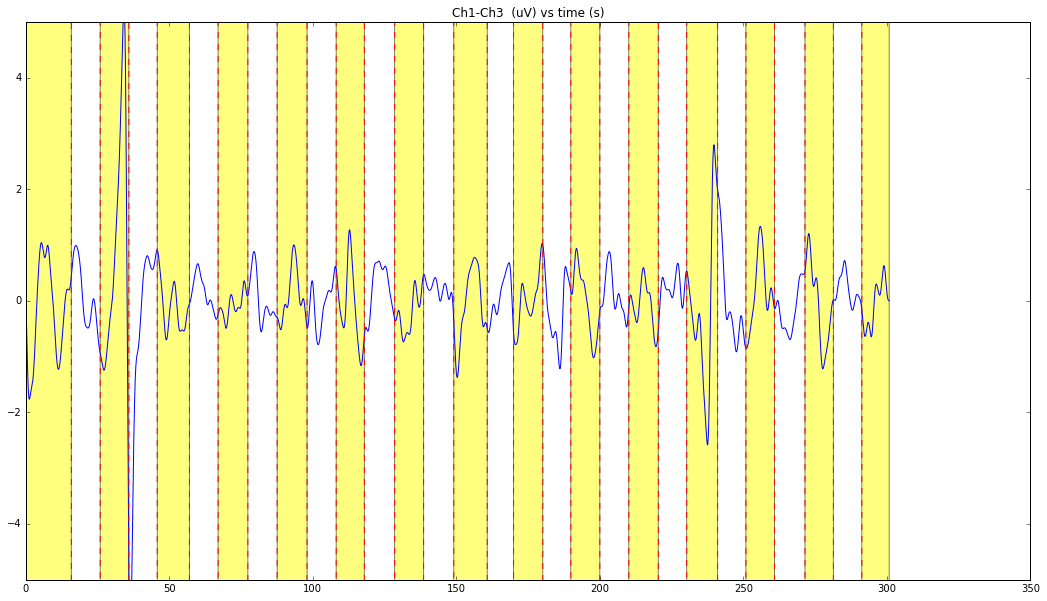

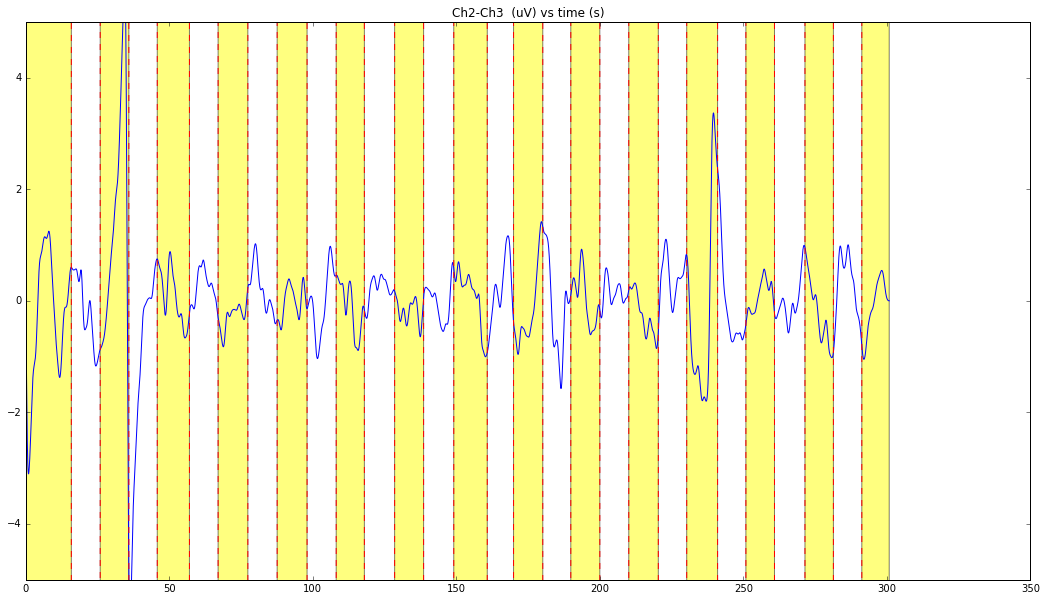

In [102]:
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch1),'b',d['t'],
         ConditionSignal(d.Ch2), 'g',d['t'],ConditionSignal(d.Ch3), 'k', d['t'], light, 'r--') 
plt.title('Ch1, Ch2  and Ch3 (uV) vs time (s)')

plt.annotate('lights on', xy=(5, -3), xytext=(5, -4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('lights off', xy=(40, -3), xytext=(40, -4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.ylim((-5,5))

plt.show()

####################

fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch1-d.Ch2),'b', d['t'],light, 'r--') 
plt.title('Ch1-Ch2  (uV) vs time (s)')
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage (uV)')
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.ylim((-5,5))
plt.savefig('plantPlot3.png')
plt.show()


######################
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch1-d.Ch3),'b', d['t'],light, 'r--') 
plt.title('Ch1-Ch3  (uV) vs time (s)')
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.ylim((-5,5))
plt.show()


fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch2-d.Ch3),'b', d['t'],light, 'r--') 
plt.title('Ch2-Ch3  (uV) vs time (s)')
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.ylim((-5,5))
plt.show()


## Fire test
Where we did an experiment by applying a flame to a leave.

In [63]:
d = pd.read_csv('plantdata/20160309194459_PlantTest4firetest.easy',delim_whitespace=True)
d.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000.-d.Ch1[0]/1000. # go to uV
d.Ch2=d.Ch2/1000.-d.Ch2[0]/1000. # go to uV
d.Ch3=d.Ch3/1000.-d.Ch3[0]/1000. # go to uV

fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/fs  

# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(d.Flag)*1.
s=0 # to start with, light was off

for n, val in enumerate(d.Flag):
     # if we see a flag equal to 2, light is off
     if d.Flag[n] == 2.:
         s=0
     # if flag is one, light is on
     elif d.Flag[n]==1.:
         s=1
     u[n]=s

light=u*20-10

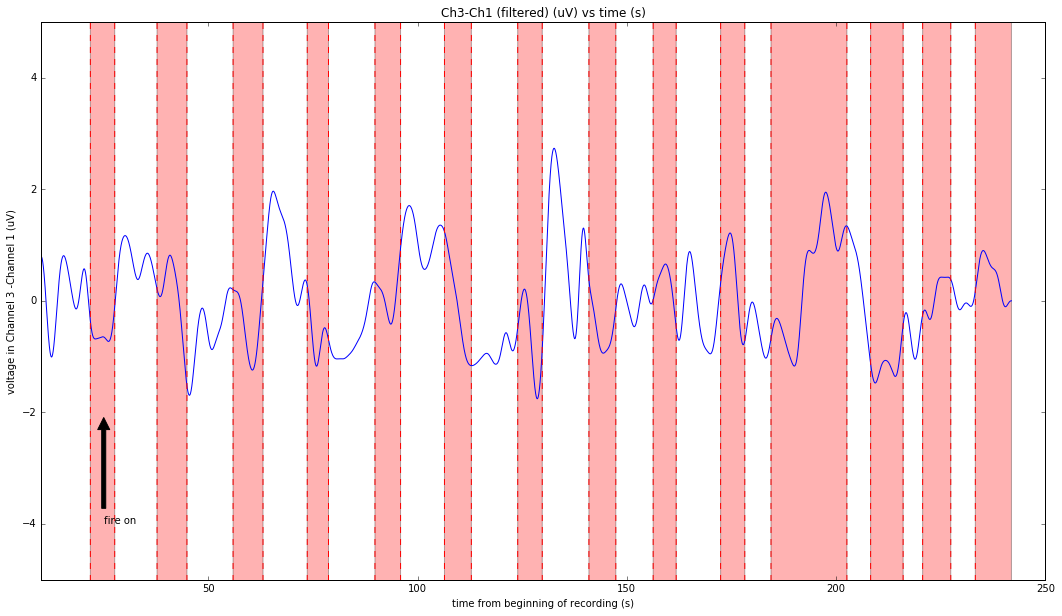

In [64]:
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch3-d.Ch1) ,d['t'], light, 'r--') 

plt.title('Ch3-Ch1 (filtered) (uV) vs time (s)')

plt.annotate('fire on', xy=(25, -2), xytext=(25, -4),
           arrowprops=dict(facecolor='black', shrink=0.05),
           )
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage in Channel 3 -Channel 1 (uV)')
plt.ylim((-5,5))

plt.xlim((10, 250))
plt.fill_between(d['t'], min(light), light, facecolor='red', alpha=0.3)
plt.savefig('plantPlot2fire.png')
plt.show()

## Last data acquisition (March 29 2016)

/home/giulio/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


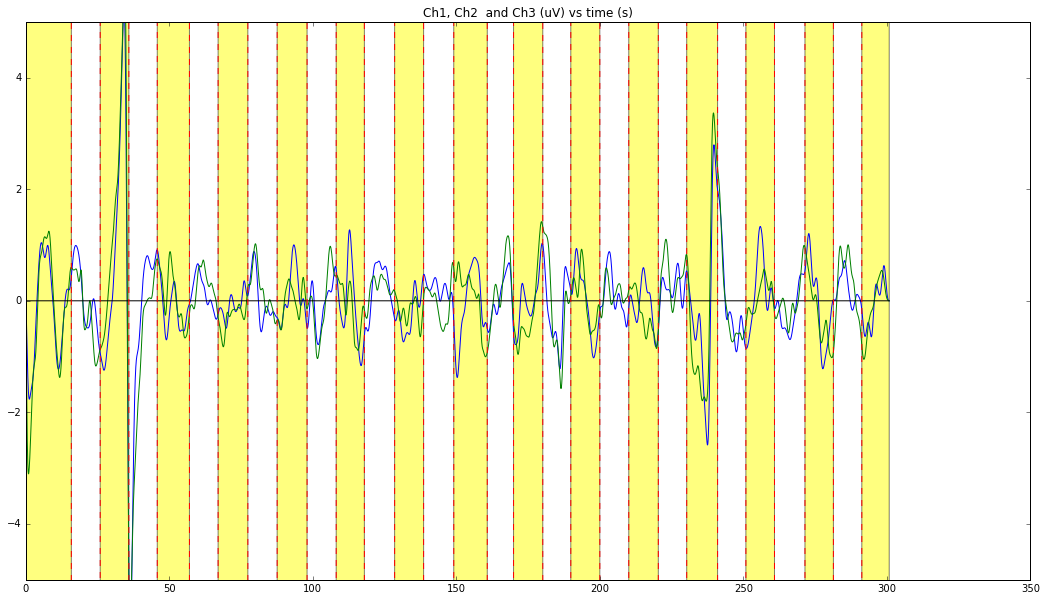

got light
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got light
got dark
got dark
got light
got dark
got light
got dark
got light
got dark
got light
got dark
got light


In [68]:
d = pd.read_csv('plantdata/20160329205452_PlantTest5onoff-4.easy',delim_whitespace=True)
d.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000.-d.Ch1[0]/1000. # go to uV
d.Ch2=d.Ch2/1000.-d.Ch2[0]/1000. # go to uV
d.Ch3=d.Ch3/1000.-d.Ch3[0]/1000. # go to uV

d.Flag[0]=1;
D= detrend(d.Ch3-d.Ch1)

fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/1000.

# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(d.Flag)*0.
s=0 # to start with, light was off

for n, val in enumerate(d.Flag):
    # if we see a flag equal to 2, light is off
    if d.Flag[n] == 2.:
        s=0
    # if flag is one, light is off
    elif d.Flag[n]== 1.:
        s=1
    u[n]=s
    
light=u*20-10    
d.Ch1=ConditionSignal(d.Ch1)


fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], ConditionSignal(d.Ch1),'b',d['t'],
         ConditionSignal(d.Ch2), 'g',d['t'],ConditionSignal(d.Ch3), 'k', d['t'], light, 'r--') 
plt.title('Ch1, Ch2  and Ch3 (uV) vs time (s)')
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.ylim((-5,5))

plt.show()


# simple averaging initialization
AverageLight=np.zeros(fs*8)
countLight=0
AverageDark=np.zeros(fs*8)
countDark=0

AverageLightStack=detrend(d.Ch1[0:0+fs*8])*0.0;
AverageDarkStack=detrend(d.Ch1[0:0+fs*8])*0.0;


#for n, val in enumerate(d.Flag[0:]):
for n in range(0,259*np.int(fs)):
    # if we see a flag equal to 2, light is off
    if d.Flag[n] == 2.:
        print "got dark"
        AverageLight[:] =AverageLight[:] + detrend(d.Ch1[n:n+fs*8])
        AverageLightStack=np.vstack((AverageLightStack, detrend(d.Ch1[n:n+fs*8])))
        countLight +=1
        
    if d.Flag[n] == 1.:
        print "got light"
        AverageDark[:]  =AverageDark[:] + detrend(d.Ch1[n:n+fs*8])
        AverageDarkStack=np.vstack((AverageDarkStack, detrend(d.Ch1[n:n+fs*8])))
        countDark +=1

AverageLight=AverageLight/countLight;
AverageDark=AverageDark/countDark;




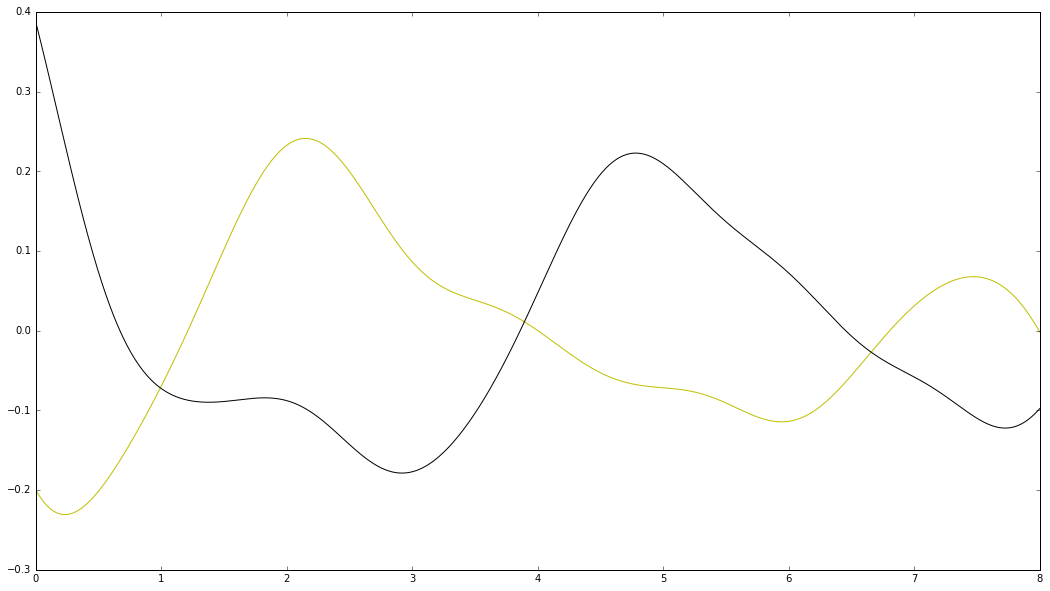

In [128]:
# we plot here the average responses for the two conditions. Yellos is lights on.
fig = plt.figure(figsize=[18.0, 10])
theTime=np.arange(fs*8)/(fs*1.0)
plt.plot(theTime, (AverageLight),'y',theTime,
         (AverageDark), 'k') 
plt.show()


### Let us  put error bars also with the "standard error of the mean":

In [85]:
## Compute the mean of the "stacks"
AveDark= np.mean(AverageDarkStack,axis=0)
AveLight= np.mean(AverageLightStack,axis=0)

## compute also the standard error of the mean (sigma / sqrt(N))
stdDark=np.std(AverageDarkStack,axis=0)/np.sqrt(AverageDarkStack.shape[0])
stdLight=np.std(AverageLightStack,axis=0)/np.sqrt(AverageLightStack.shape[0])

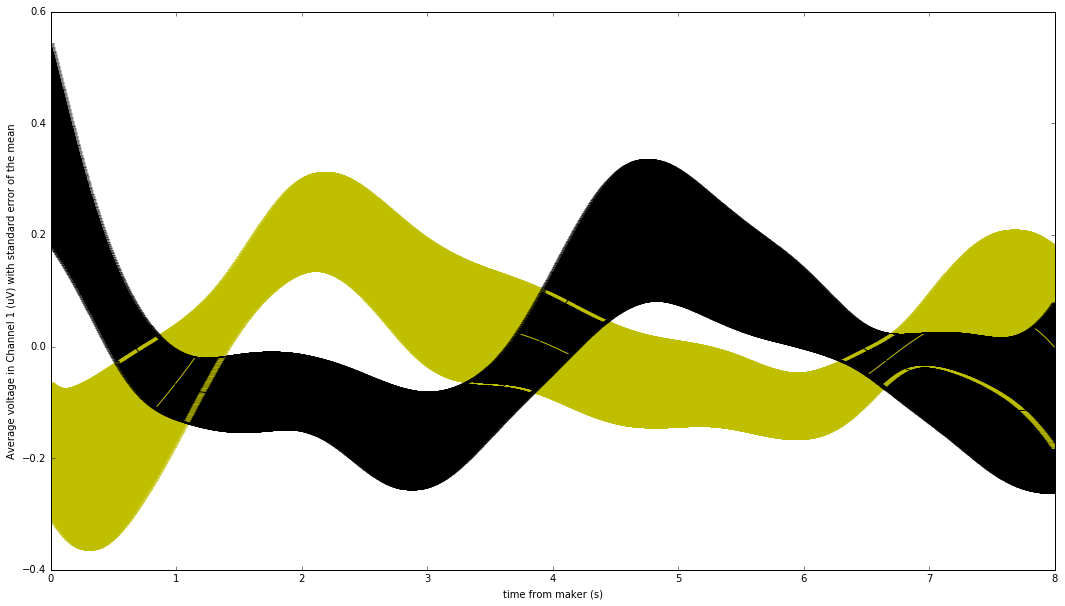

In [96]:
# Plot the average evoked responses with error bars.
fig = plt.figure(figsize=[18.0, 10])
plt.errorbar(theTime,AveLight, yerr=stdLight,color='y')
plt.errorbar(theTime,AveDark, yerr=stdDark, color='k')

plt.xlabel('time from maker (s)')
plt.ylabel('Average voltage in Channel 1 (uV) with standard error of the mean')
plt.show()

# Conclusions


We have plotted the data and looked at the average response in the two conditions. The resulting average responses (evoked potentials in EEG lingo) are different in several points. However, this experiment should be repeated several times to assess if this is just a statistical fluctuation or if it is robust.

## References

- Stefano Mancuso and Alessandra Viola, Brilliant Green: The Surprising History and Science of Plant Intelligence,Island Press (March 12, 2015)
- JÖRG FROMM & SILKE LAUTNER, Electrical signals and their physiological significance in plants, Plant, Cell and Environment (2007) 30, 249–257 
- The secret life of plants, https://www.quantamagazine.org/20131216-the-secret-language-of-plants/
- Seyed A. R. Mousavi, Adeline Chauvin, François Pascaud, Stephan Kellenberger & Edward E. Farmer, GLUTAMATE RECEPTOR-LIKE genes mediate leaf-to-leaf wound signalling, Nature 500, 422–426 (22 August 2013) 




## Annex: some needed functions for filtering

In [13]:
def plotSpectrum(signal):
    fs=500
    fig = plt.figure(figsize=[18.0, 10])
    f, Pxx_den = periodogram(signal, fs,nfft= 4*fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-3, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [nV**2/Hz]')
    plt.xlim((0,80))
    plt.show()

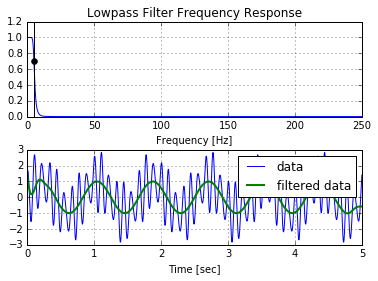

In [14]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data) # back and forth
    return y

# def butter_highpass(cutoff, fs, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='high', analog=False)
#     return b, a

# def butter_highpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_highpass(cutoff, fs, order=order)
#     y = filtfilt(b, a, data)
#     return y


def butter_bandpass(cutoff1, cutoff2, fs, order=5):
     nyq = 0.5 * fs
     normal_cutoff1 = cutoff1 / nyq
     normal_cutoff2 = cutoff2 / nyq

     b, a = butter(order, [normal_cutoff1,normal_cutoff2], btype='band')
     return b, a

def butter_bandpass_filter(data, cutoff1,cutoff2, fs, order=5):
     b, a = butter_bandpass(cutoff1,cutoff2, fs, order=order)
     y = filtfilt(b, a, data)
     return y



# Filter requirements.
order = 6
fs = 500.0       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [15]:
def ConditionSignal(D):
    D1=  butter_lowpass_filter(detrend(D), cutoff=1, fs=500, order=6)
    D1=  butter_bandpass_filter(detrend(D1), cutoff1=.05, cutoff2=0.5, fs=500, order=2)
    return D1


## ANNEX: Equipment for EEG and stimulation from Neuroelectrics (Starstim)

In [ ]:
from IPython.display import IFrame
IFrame('http://neuroelectrics.com', width='100%', height=350)

In [ ]:
this is the Matlab timer program we used for 10 seconds pauses:

% A simple Matlab program to play a gong (high or low for lights on or
% lights off) every 10 seconds

load gong.mat; % load sound sequence (for a gong)

for n=1:1000
sound(y, 2*Fs); % play low gong (2x frequency)
pause(10) % pause for 10 seconds
sound(y, 5*Fs); % play high gong (5x frequency)
pause(10) % pause for 10 seconds
end

